In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Load dataset from Excel (limit to 10,000 records)
file_path = "E:\codeforces\social_media_engagement_data.xlsx"  # Change this to your actual file path
df = pd.read_excel(file_path).head(10000)

<>:2: SyntaxWarning: invalid escape sequence '\c'
<>:2: SyntaxWarning: invalid escape sequence '\c'
C:\Users\hp\AppData\Local\Temp\ipykernel_10600\245715784.py:2: SyntaxWarning: invalid escape sequence '\c'
  file_path = "E:\codeforces\social_media_engagement_data.xlsx"  # Change this to your actual file path


In [12]:
# Ensure "Post Timestamp" is treated as datetime
df["Post Timestamp"] = pd.to_datetime(df["Post Timestamp"], errors="coerce")

# Drop rows where timestamp parsing failed
df = df.dropna(subset=["Post Timestamp"])

# Convert timestamps to monthly intervals
df["Month"] = df["Post Timestamp"].dt.to_period("M").astype(str)

C:\Users\hp\AppData\Local\Temp\ipykernel_10600\2284604748.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="Platform", data=df, palette="coolwarm")


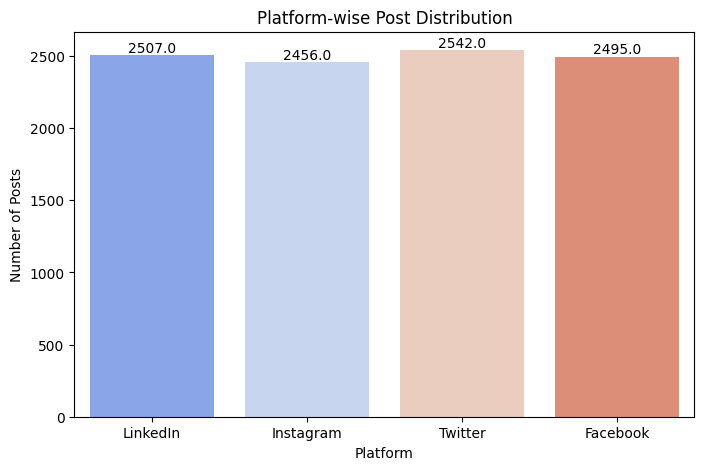

In [13]:
# 1. Platform-wise post distribution
plt.figure(figsize=(8, 5))
ax = sns.countplot(x="Platform", data=df, palette="coolwarm")
plt.title("Platform-wise Post Distribution")
plt.xlabel("Platform")
plt.ylabel("Number of Posts")

# Annotate with numeric values
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')

plt.show()

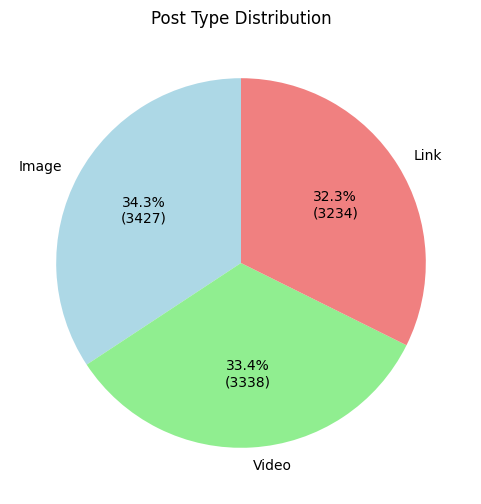

In [14]:
# 2. Post Type Popularity
plt.figure(figsize=(6, 6))
post_type_counts = df["Post Type"].value_counts()
post_type_counts.plot.pie(autopct=lambda p: f'{p:.1f}%\n({int(p*post_type_counts.sum()/100)})',
                          colors=["lightblue", "lightgreen", "lightcoral"], startangle=90)
plt.title("Post Type Distribution")
plt.ylabel("")
plt.show()

In [15]:
# 3. Likes Over Time (Monthly)
monthly_likes = df.groupby("Month")["Likes"].sum().reset_index()

# Store Likes values for min, max, and average calculations
likes_values = monthly_likes["Likes"].tolist()

# Calculate min, max, and average
min_value = min(likes_values)
max_value = max(likes_values)
average_value = sum(likes_values) / len(likes_values)

# Print min, max, and average values
print(f"Min Likes: {min_value}")
print(f"Max Likes: {max_value}")
print(f"Average Likes: {average_value:.2f}")

Min Likes: 33172
Max Likes: 161750
Average Likes: 135587.00
